In [900]:
# Importing Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [901]:
#Importing the loan.csv file
loan = pd.read_csv("D:\\Official\\Machine Learning\\Upgrad PG Program\\Lending Club Case Study\\loan\\loan.csv", low_memory=False)

In [902]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [903]:
loan.shape

(39717, 111)

In [904]:
#Checking the percentage of missing values in each column
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [905]:
#Deleting columns with more than 50% missing values
loan = loan.dropna(thresh=len(loan)*0.5, axis=1)

In [906]:
loan.shape

(39717, 54)

We have 54 Columns left

In [907]:
#Finding number of unique values in each vcolumn
loan.nunique().sort_values().head(54)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [908]:
#Deleting columns which doesnt help much with the analysis and with more unique value and no unique values

loan = loan.drop(['desc','emp_title','member_id', 'id', 'url','delinq_amnt', 'acc_now_delinq', 'application_type','policy_code', 'pymnt_plan', 'initial_list_status', 'chargeoff_within_12_mths','tax_liens', 'collections_12_mths_ex_med','zip_code','emp_title','out_prncp','out_prncp_inv'], axis=1)

In [909]:
round(100*(loan.isnull().sum()/len(loan.index)), 2)

loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
title                      0.03
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
total_pymnt                0.00
total_pymnt_inv            0.00
total_rec_prncp            0.00
total_rec_int              0.00
total_rec_late_fee         0.00
recoveri

Imputing the Missing values with relevant metrics

In [910]:
#Imputing te categorical missing with Mode metrics

loan["emp_length"] = loan["emp_length"].fillna(loan["emp_length"].mode()[0])
loan["title"] = loan["title"].fillna(loan["title"].mode()[0])
loan["revol_util"] = loan["revol_util"].apply(lambda x: float(str(x).replace("%","")))

#Imputing te numerical missing with Mean metrics
loan["revol_util"] = loan["revol_util"].fillna(loan["revol_util"].mean())
loan["pub_rec_bankruptcies"] = loan["pub_rec_bankruptcies"].fillna(loan["pub_rec_bankruptcies"].mean())

#Filtering the null rows
loan = loan[-loan["last_pymnt_d"].isnull()]
loan = loan[-loan["last_credit_pull_d"].isnull()]

round(100*(loan.isnull().sum()/len(loan.index)), 2)

loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
title                      0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_rec_int              0.0
total_rec_late_fee         0.0
recoveries                 0.0
collecti

In [911]:
loan.shape

(39644, 37)

In [912]:
#Calculating the data loss
round(100-round(100*len(loan.index)/39717,2),2)

0.18

We lost 0.18% of the data in Data Cleaning, now we can proceed with further analysis

In [913]:
#Filtering the Current loan status as this doesnt give any inference when the loan is still in progress
loan = loan[loan.loan_status != 'Current']

In [914]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38504 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38504 non-null  int64  
 1   funded_amnt              38504 non-null  int64  
 2   funded_amnt_inv          38504 non-null  float64
 3   term                     38504 non-null  object 
 4   int_rate                 38504 non-null  object 
 5   installment              38504 non-null  float64
 6   grade                    38504 non-null  object 
 7   sub_grade                38504 non-null  object 
 8   emp_length               38504 non-null  object 
 9   home_ownership           38504 non-null  object 
 10  annual_inc               38504 non-null  float64
 11  verification_status      38504 non-null  object 
 12  issue_d                  38504 non-null  object 
 13  loan_status              38504 non-null  object 
 14  purpose               

Converting Dtypes of the columns for further analysis

In [915]:
#Converting the Object Dtype to numeric by replacing the charecters in data
loan["term"] = loan["term"].apply(lambda x: int(str(x).replace("months","")))
loan["int_rate"] = loan["int_rate"].apply(lambda x: float(str(x).replace("%","")))
loan["emp_length"] = loan["emp_length"].apply(lambda x: int((((str(x).replace("< 1 year","0")).replace("years","")).replace("year","")).replace("+","")))
loan["revol_util"] = loan["revol_util"].apply(lambda x: float(str(x).replace("%","")))

In [916]:
#Converting the Object Dtype to Date Time
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')

In [917]:
#Derived metrics from the Date column issue_d

#issued date column
loan['issued_year'] = loan.issue_d.dt.year
loan['issued_month'] = loan.issue_d.dt.strftime('%b')
loan['issued_weekday'] = loan.issue_d.dt.weekday

#data type conversion of year and weekday
loan['issued_weekday'] = loan['issued_weekday'].astype(object)

#earliest_cr_line date column
loan['earliest_cr_line_year'] = loan.earliest_cr_line.dt.year
loan['earliest_cr_line_month'] = loan.earliest_cr_line.dt.strftime('%b')

#data type conversion of year and weekday
loan['earliest_cr_line_year'] = loan['earliest_cr_line_year'].astype(object)

## Univariate Analysis

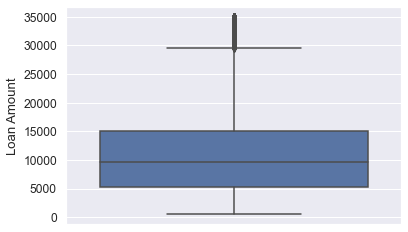

In [918]:
sns.boxplot( y=loan["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

##### Inference: Most of the loans taken are around 10,000

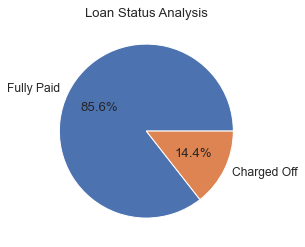

In [919]:
loan["loan_status"].value_counts(1).plot.pie(autopct='%1.1f%%')
plt.ylabel("")
plt.xlabel('')
plt.title("Loan Status Analysis")
plt.show()

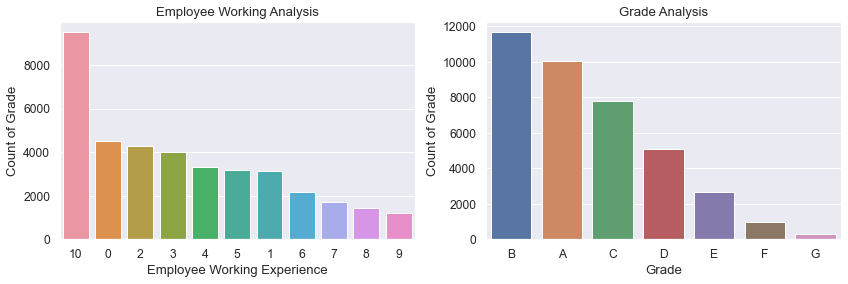

In [920]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.countplot(x='emp_length', data=loan, order=loan['emp_length'].value_counts().index)
plt.ylabel("Count of Grade")
plt.xlabel('Employee Working Experience')
plt.title("Employee Working Analysis")

plt.subplot(1,2,2)

sns.countplot(x='grade', data=loan, order=loan['grade'].value_counts().index)
plt.ylabel("Count of Grade")
plt.xlabel("Grade")
plt.title("Grade Analysis")

plt.show()

##### Inference: Most of the Loanes applied are people with 10+ Years of experience and the Loan Grades highly applied are B, A, C


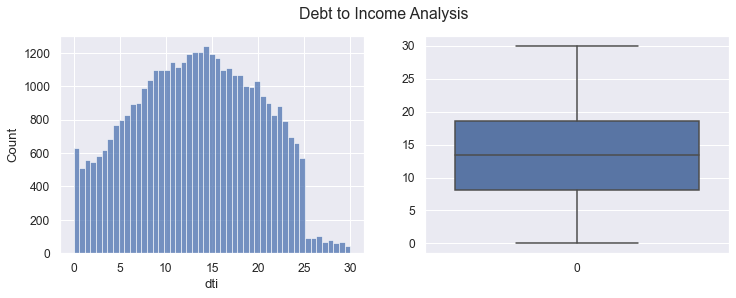

In [921]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=loan["dti"])
plt.subplot(1,2,2)
sns.boxplot(data=loan["dti"])
plt.suptitle('Debt to Income Analysis')
plt.show()

##### Inference: The DTI is < 30 for all the loans and the median lies between 10-15

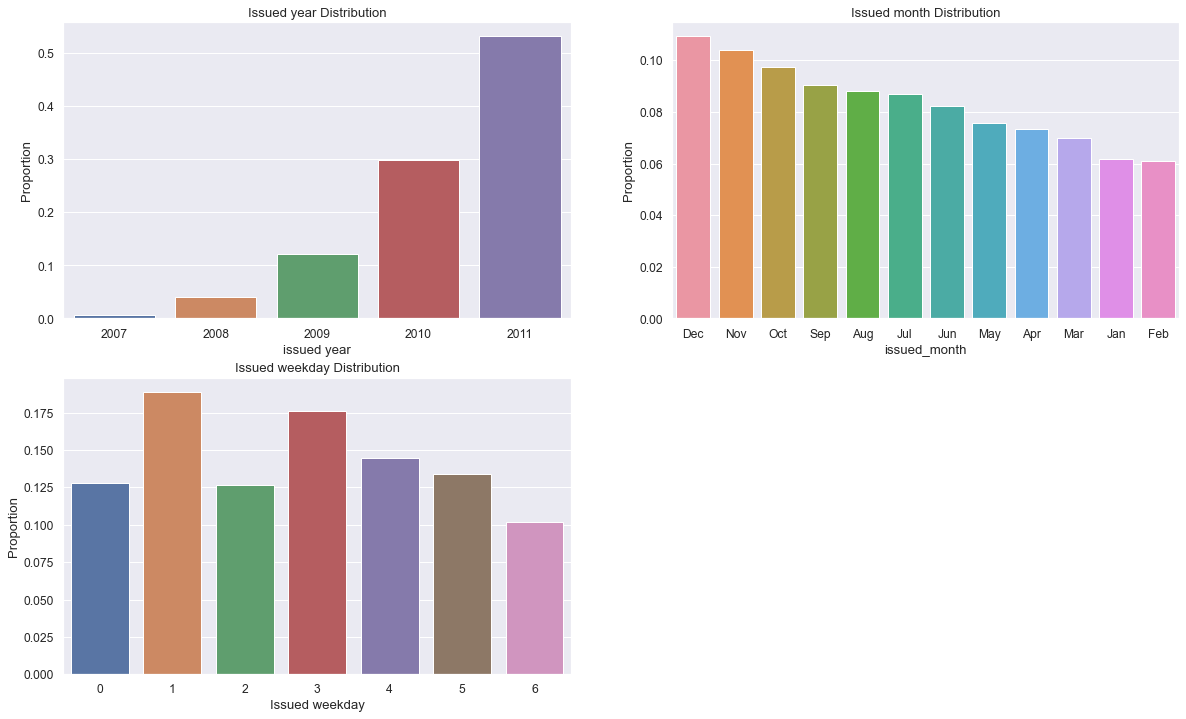

In [922]:
#Analysis for the Year, Month and Weekday
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.barplot(x='index', y='issued_year', data=loan['issued_year'].value_counts(normalize=True).reset_index())
plt.xlabel('issued year')
plt.ylabel('Proportion')
plt.title('Issued year Distribution')


plt.subplot(2,2,2)
sns.barplot(x='index', y='issued_month', data=loan['issued_month'].value_counts(normalize=True).reset_index())
plt.xlabel('issued_month')
plt.ylabel('Proportion')
plt.title('Issued month Distribution')


plt.subplot(2,2,3)
sns.barplot(x='index', y='issued_weekday', data=loan['issued_weekday'].value_counts(normalize=True).reset_index())
plt.xlabel('Issued weekday')
plt.ylabel('Proportion')
plt.title('Issued weekday Distribution')

plt.show()


##### Inferences:
##### The Number of Loan applications increases every year.
##### More loans are issues in the last three months of the year i.e Oct, Nov , Dec.
##### More loans are issued on tuesday and wednessday than other week days.

## Bivariate Analysis

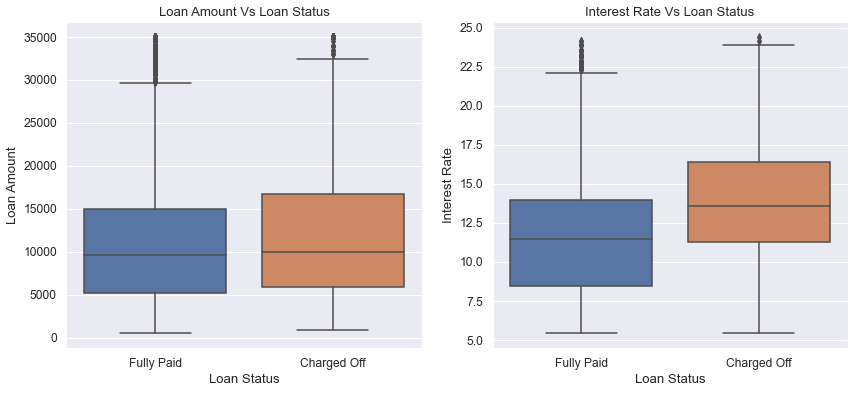

In [923]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.boxplot(x='loan_status', y='loan_amnt',data=loan)
plt.ylabel("Loan Amount")
plt.xlabel("Loan Status")
plt.title("Loan Amount Vs Loan Status")

plt.subplot(1,2,2)
sns.boxplot(x='loan_status', y='int_rate',data=loan)
plt.ylabel("Interest Rate")
plt.xlabel("Loan Status")
plt.title("Interest Rate Vs Loan Status")

plt.show()

##### Inferences:
##### Loan Amount Vs Loan Status shows slight variation in the median range between fully paid and Charged Off
##### Interest Rate Vs Loan Status shows significant variation explaining that higher the interest rate higher the charge Off

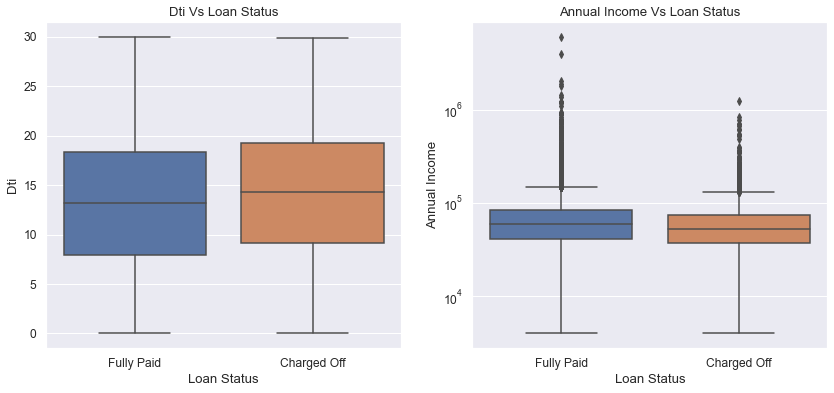

In [924]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.boxplot(x='loan_status', y='dti',data=loan)
plt.ylabel("Dti")
plt.xlabel("Loan Status")
plt.title("Dti Vs Loan Status")

plt.subplot(1,2,2)
sns.boxplot(x='loan_status', y='annual_inc',data=loan)
plt.yscale('log')
plt.ylabel("Annual Income")
plt.xlabel("Loan Status")
plt.title("Annual Income Vs Loan Status")

plt.show()

##### Inferences:
##### Dti Vs Loan Status shows slight variation in the median range between fully paid and Charged Off
##### Annual Income Vs Loan Status shows Slight variation explaining that the annual income for the Charge Off status is lower

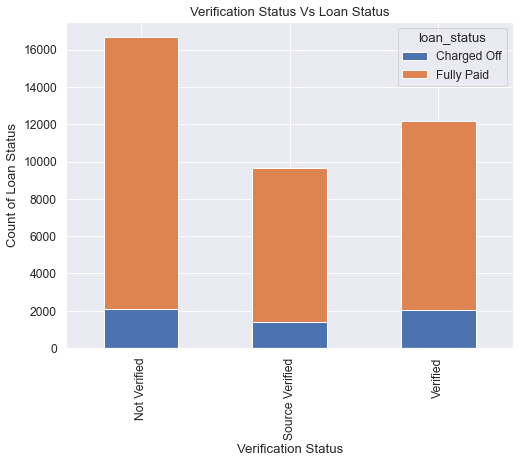

In [925]:
Loan_Temp = pd.pivot_table(data=loan, index=loan["verification_status"], columns=loan["loan_status"],values="loan_status", aggfunc='count')
Loan_Temp.plot(kind="bar", stacked="True", figsize=[8,6])
plt.ylabel("Count of Loan Status")
plt.xlabel("Verification Status")
plt.title("Verification Status Vs Loan Status")
plt.show()

##### Inference: There is only a slight variation in the charge Off between Verified and Non verified profiles

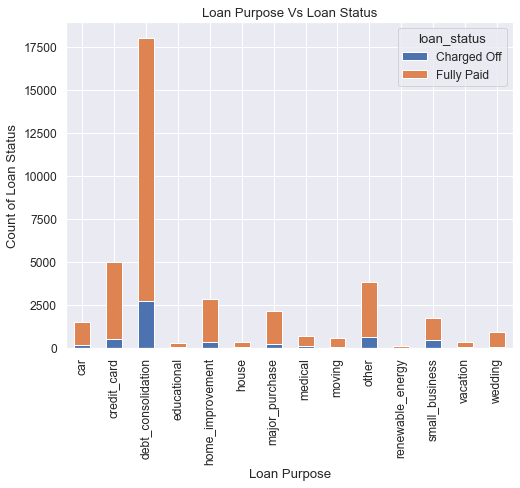

In [926]:
Loan_Temp = pd.pivot_table(data=loan, index=loan["purpose"], columns=loan["loan_status"],values="loan_status", aggfunc='count')
Loan_Temp.plot(kind="bar", stacked="True", figsize=[8,6])
plt.ylabel("Count of Loan Status")
plt.xlabel("Loan Purpose")
plt.title("Loan Purpose Vs Loan Status")
plt.show()

##### Inference: More number of Charge Off profiles have taken loan under Debt Consolidation

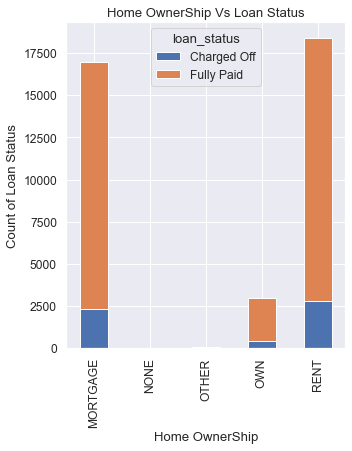

In [927]:
Loan_Temp = pd.pivot_table(data=loan, index=loan["home_ownership"], columns=loan["loan_status"],values="loan_status", aggfunc='count')
Loan_Temp.plot(kind="bar", stacked="True", figsize=[5,6])
plt.ylabel("Count of Loan Status")
plt.xlabel("Home OwnerShip")
plt.title("Home OwnerShip Vs Loan Status") 
plt.show()

##### Inference: More number of Charge Off profiles have the Home Ownership under Mortgage or Rent

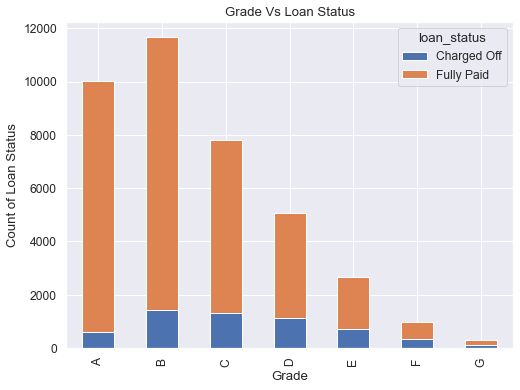

In [928]:
Loan_Temp = pd.pivot_table(data=loan, index=loan["grade"], columns=loan["loan_status"],values="loan_status", aggfunc='count')
Loan_Temp.plot(kind="bar", stacked="True", figsize=[8,6])
plt.ylabel("Count of Loan Status")
plt.xlabel("Grade")
plt.title("Grade Vs Loan Status") 
plt.show()

##### Inference: More loans are under the grades of B, C and D

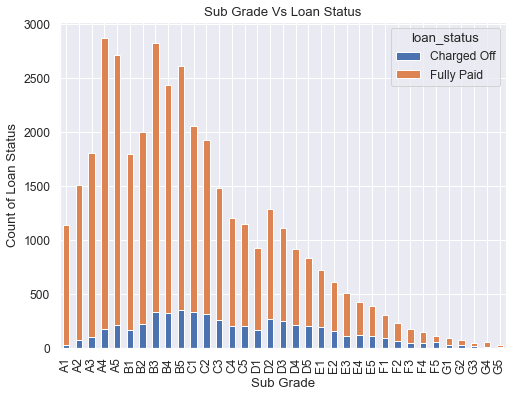

In [929]:
Loan_Temp = pd.pivot_table(data=loan, index=loan["sub_grade"], columns=loan["loan_status"],values="loan_status", aggfunc='count')
Loan_Temp.plot(kind="bar", stacked="True", figsize=[8,6])
plt.ylabel("Count of Loan Status")
plt.xlabel("Sub Grade")
plt.title("Sub Grade Vs Loan Status") 
plt.show()

##### Inference: The Subgrade distribution is left skewed

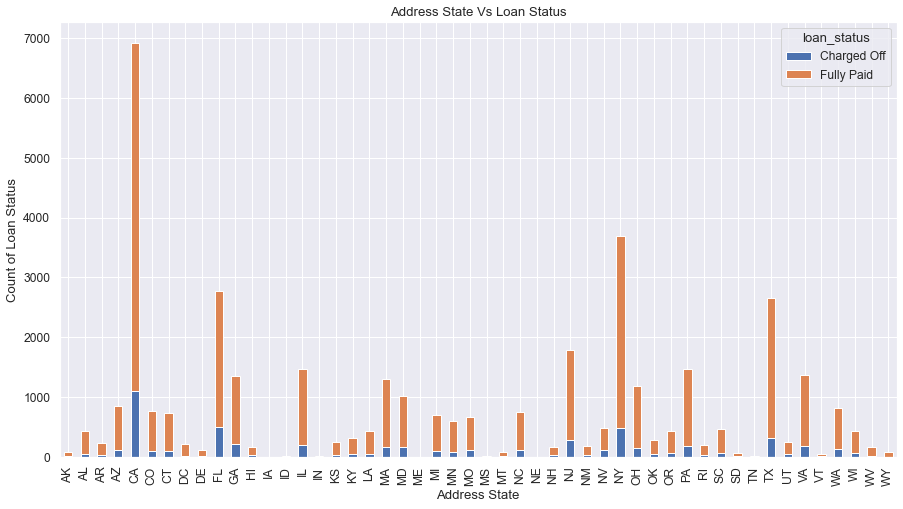

In [930]:
Loan_Temp = pd.pivot_table(data=loan, index=loan["addr_state"], columns=loan["loan_status"],values="loan_status", aggfunc='count')
Loan_Temp.plot(kind="bar", stacked="True", figsize=[15,8])
plt.ylabel("Count of Loan Status")
plt.xlabel("Address State")
plt.title("Address State Vs Loan Status") 
plt.show()

##### Inference: Loans from the regions of CA,NY and FL have more charge Off

### Multivariate Analysis

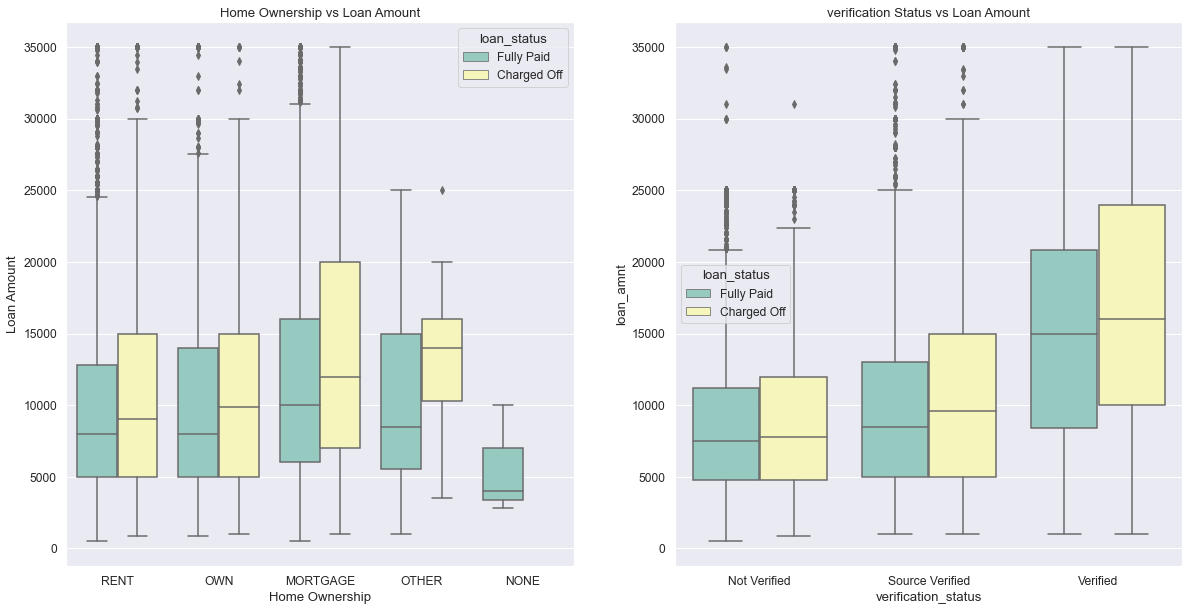

In [931]:
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan.loan_amnt, data=loan, hue="loan_status",  palette="Set3")
plt.ylabel("Loan Amount")
plt.xlabel("Home Ownership")
plt.title('Home Ownership vs Loan Amount')

plt.subplot(122)
plt.title('verification Status vs Loan Amount')
plt.ylabel("Loan Amount")
plt.xlabel("verification Status")
verification_status_ord = loan.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan.loan_amnt, order = verification_status_ord, data=loan, hue="loan_status",  palette="Set3")

plt.show()

##### Inference:
##### Profiles with home ownership under Mortgage and applied for a loan more than 10,000 are more ikely to default


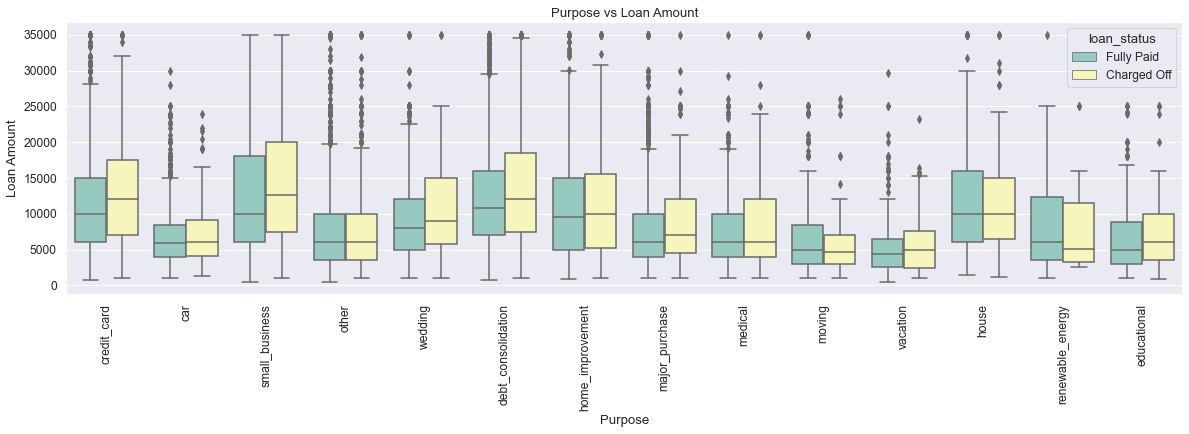

In [932]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan.loan_amnt, data=loan, hue="loan_status",  palette="Set3")
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.title('Purpose vs Loan Amount')
plt.ylabel("Loan Amount")
plt.xlabel("Purpose")
plt.show()

##### Inference:
##### The Purpose of Small Business applied for loan above 10,000 are likely to default
##### The purpose of Credit Card, Debt Consolidation and home improvement also need to be verified

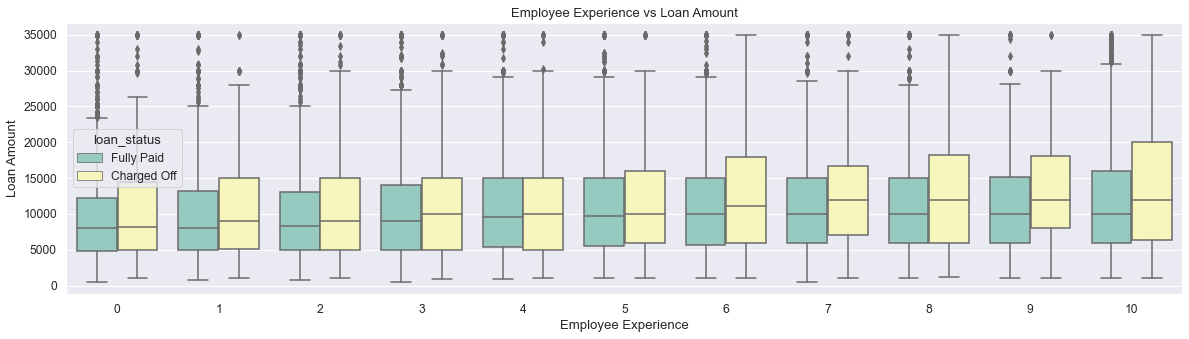

In [933]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan.loan_amnt, data=loan, hue="loan_status",  palette="Set3")
plt.title('Employee Experience vs Loan Amount')
plt.ylabel("Loan Amount")
plt.xlabel("Employee Experience")
plt.show()

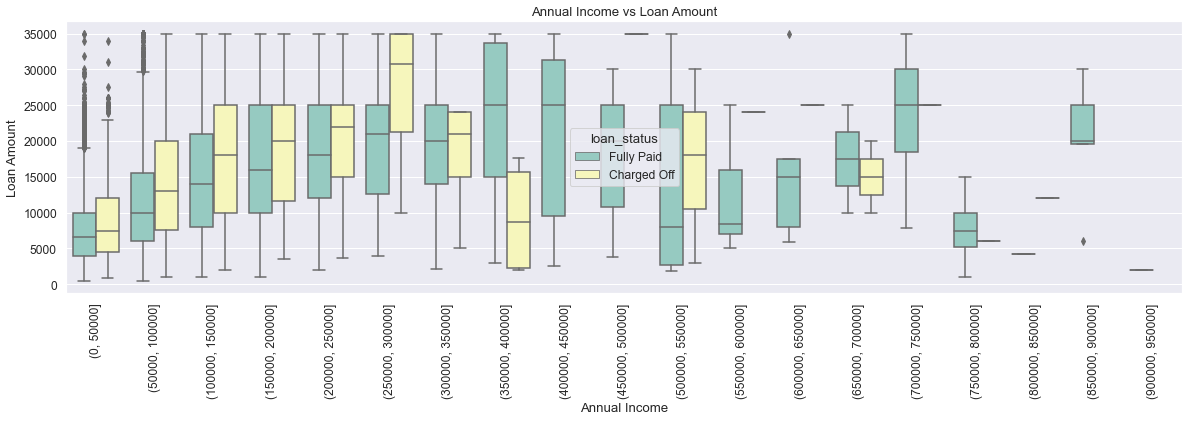

In [934]:
plt.figure(figsize=(20,5))
loan['Income_group'] = pd.cut(loan['annual_inc'], bins=range(0, 1000000, 50000))
sns.boxplot(x=loan['Income_group'], y=loan.loan_amnt, data=loan, hue="loan_status",  palette="Set3")
plt.title('Annual Income vs Loan Amount')
plt.ylabel("Loan Amount")
plt.xlabel("Annual Income")
plt.xticks(rotation=90)
plt.show()

##### Inference: Higher Charge off ratio is ranging between the Annula income of 0-1000000
##### lets go more in details with smaller groups the Income group 250000-300000 who are applying for a loan of above 20000 are likely to default
##### The Income group 350000-400000 applying for a loan below 15000 are likely to default

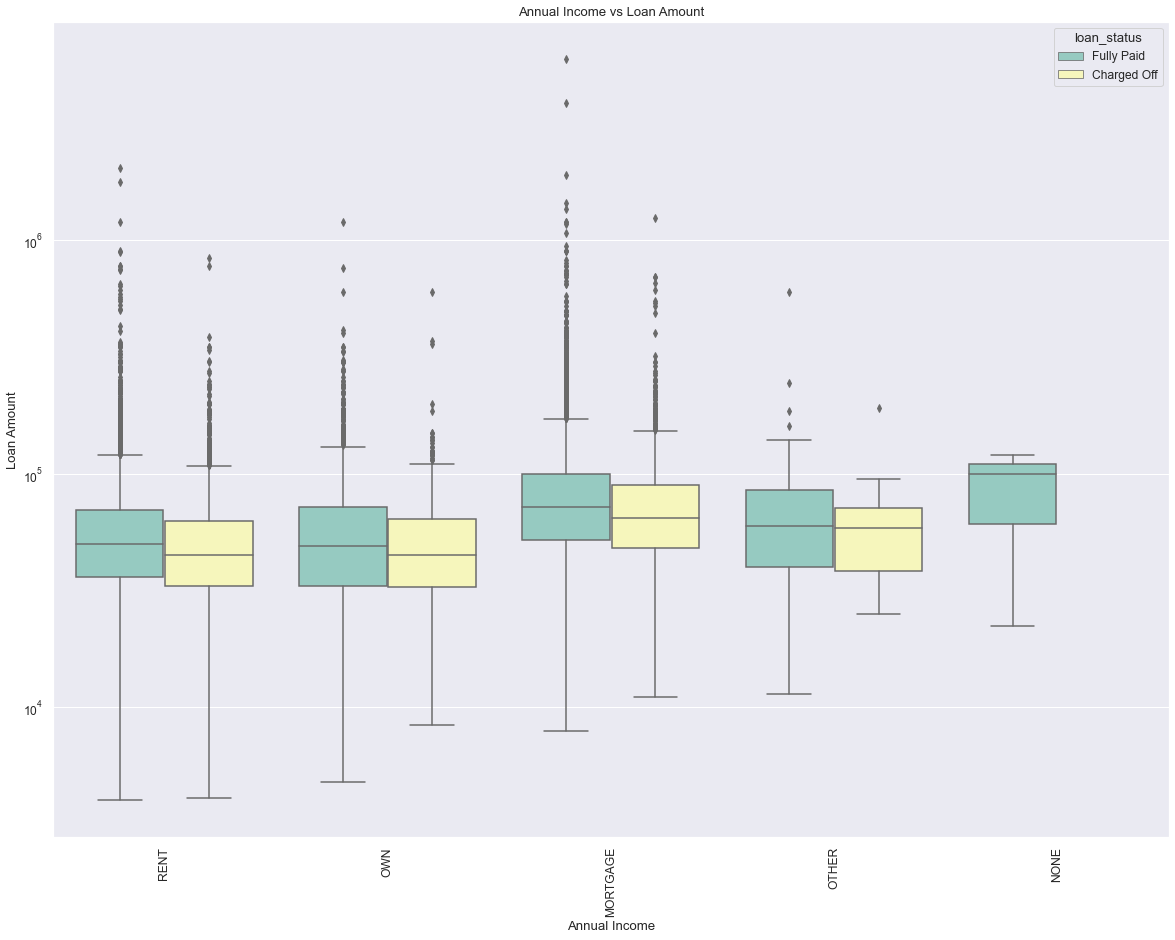

In [935]:
plt.figure(figsize=(20,15))
sns.boxplot(x='home_ownership', y=loan.annual_inc, data=loan, hue="loan_status",  palette="Set3")
plt.title('Annual Income vs Loan Amount')
plt.ylabel("Loan Amount")
plt.xlabel("Annual Income")
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

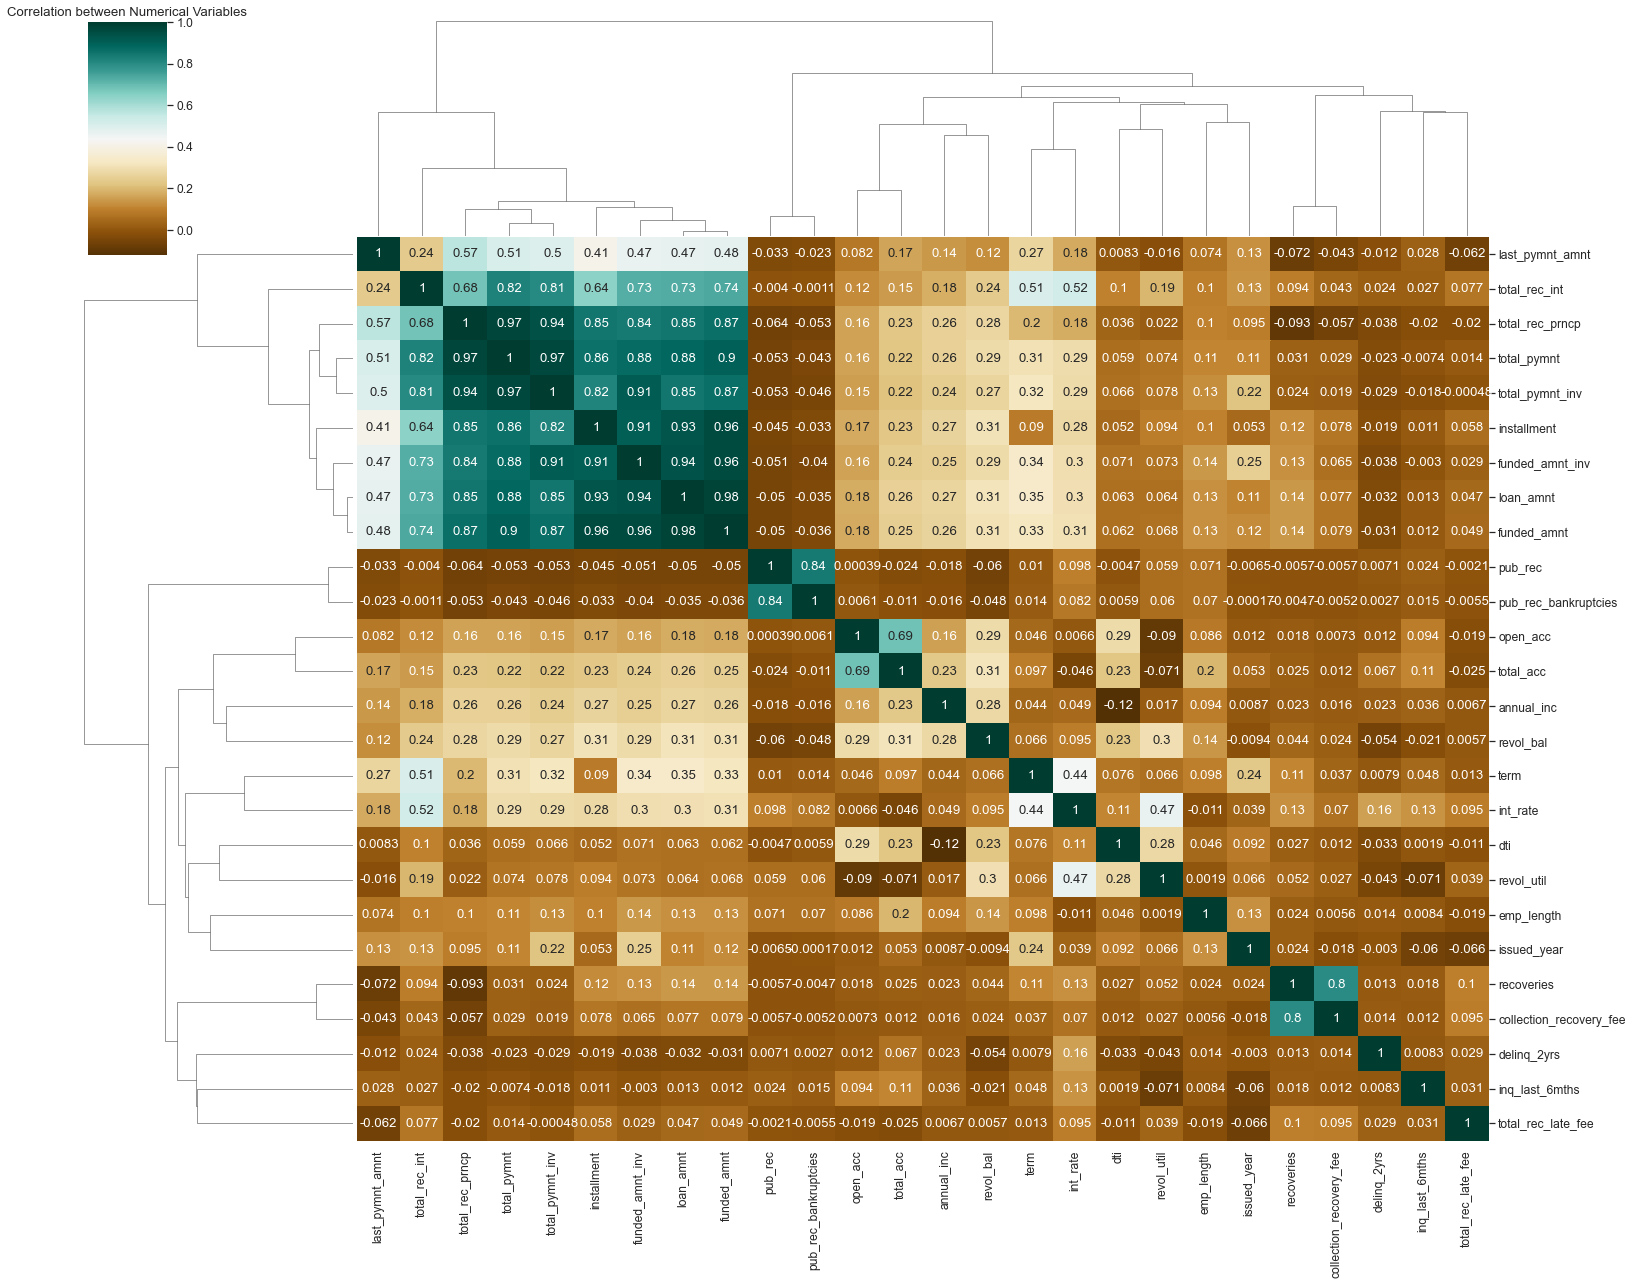

In [936]:
# Correlation for all the numerical variables
loan_correlation = loan.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(22, 18),cmap="BrBG")
plt.title("Correlation between Numerical Variables") 
plt.show()

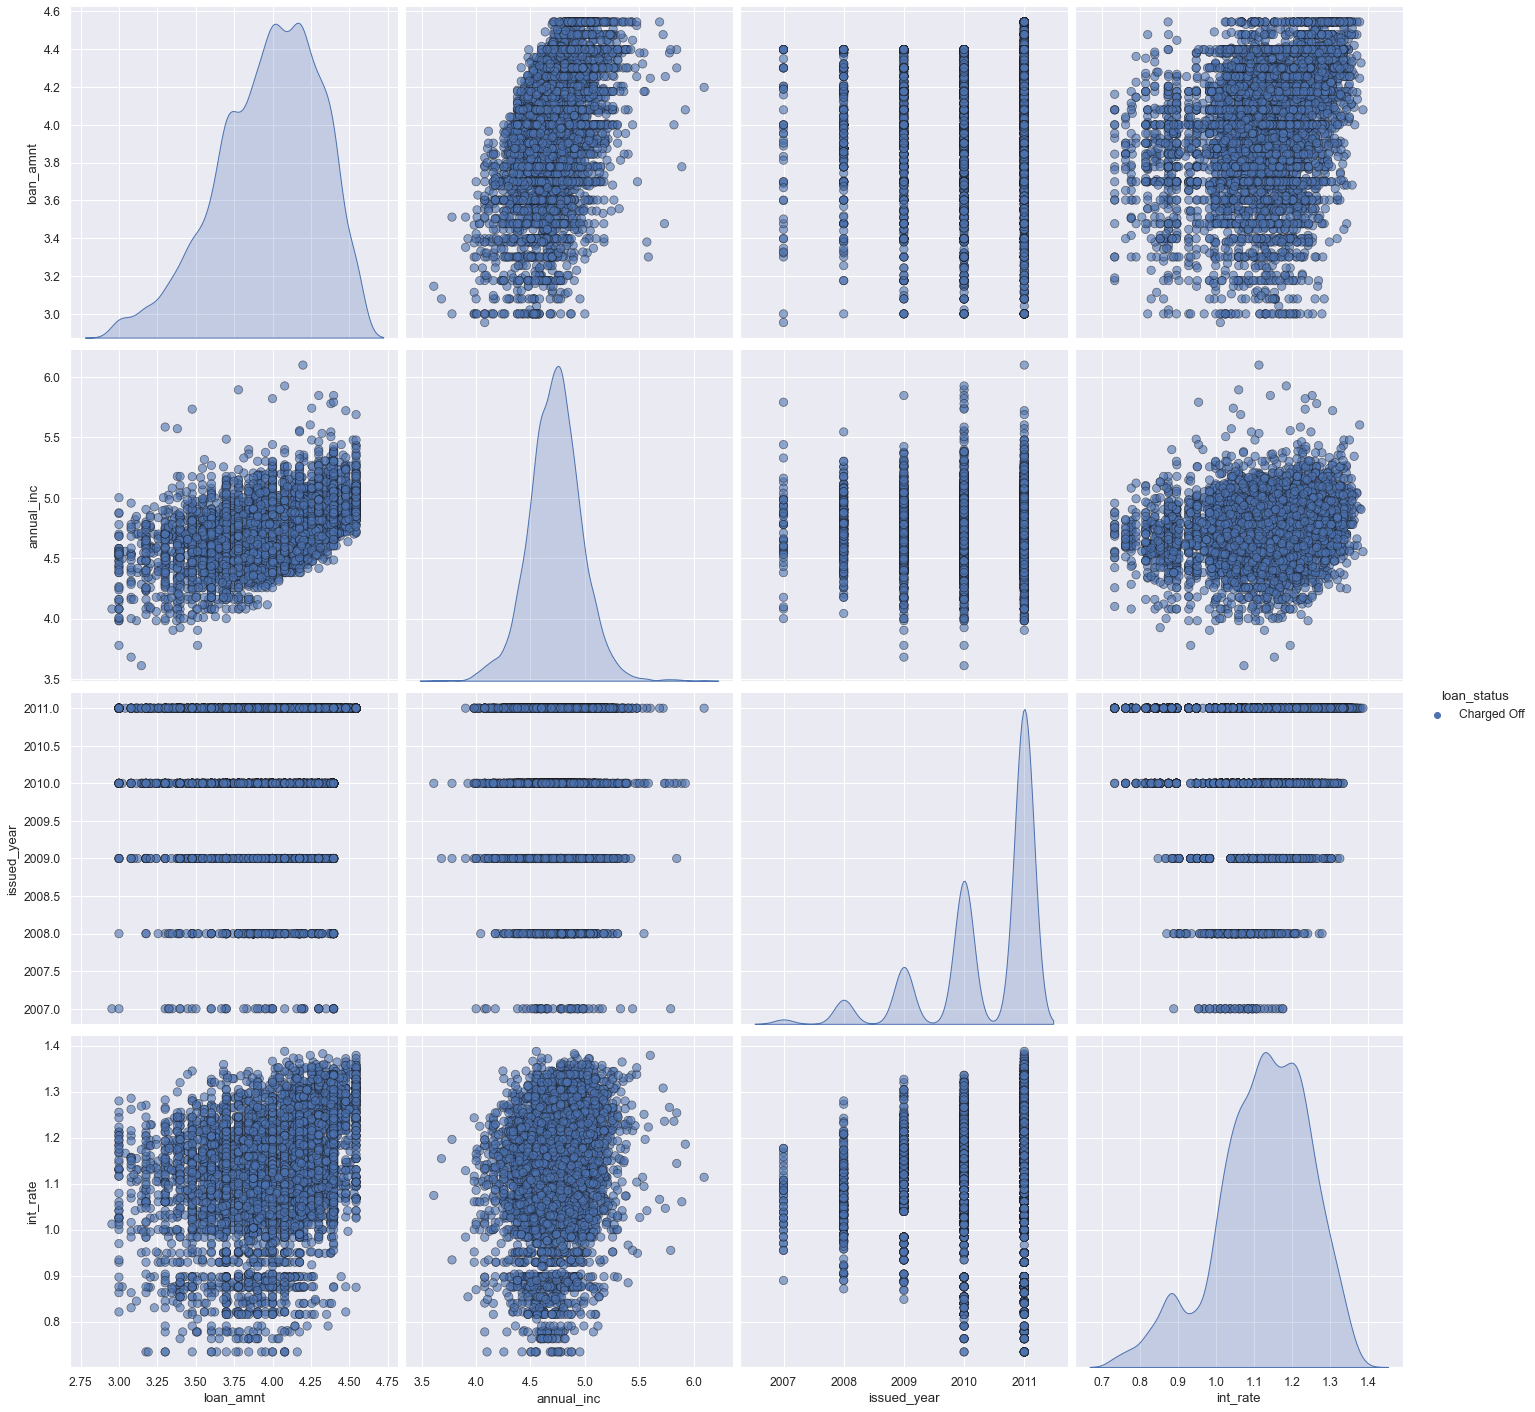

In [937]:
# Pairplot analysis for the variables 'loan_amnt', 'annual_inc', 'issued_year','int_rate','loan_status'
loan_pair = loan[['loan_amnt', 'annual_inc', 'issued_year','int_rate','loan_status']].copy()
loan_pair.head()
loan_pair = loan_pair[-(loan_pair["loan_status"] != "Charged Off")]
# Take the log of below variables as they are heavily skewed
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

# Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 70, 'edgecolor': 'k'},
             height = 5)
plt.show()

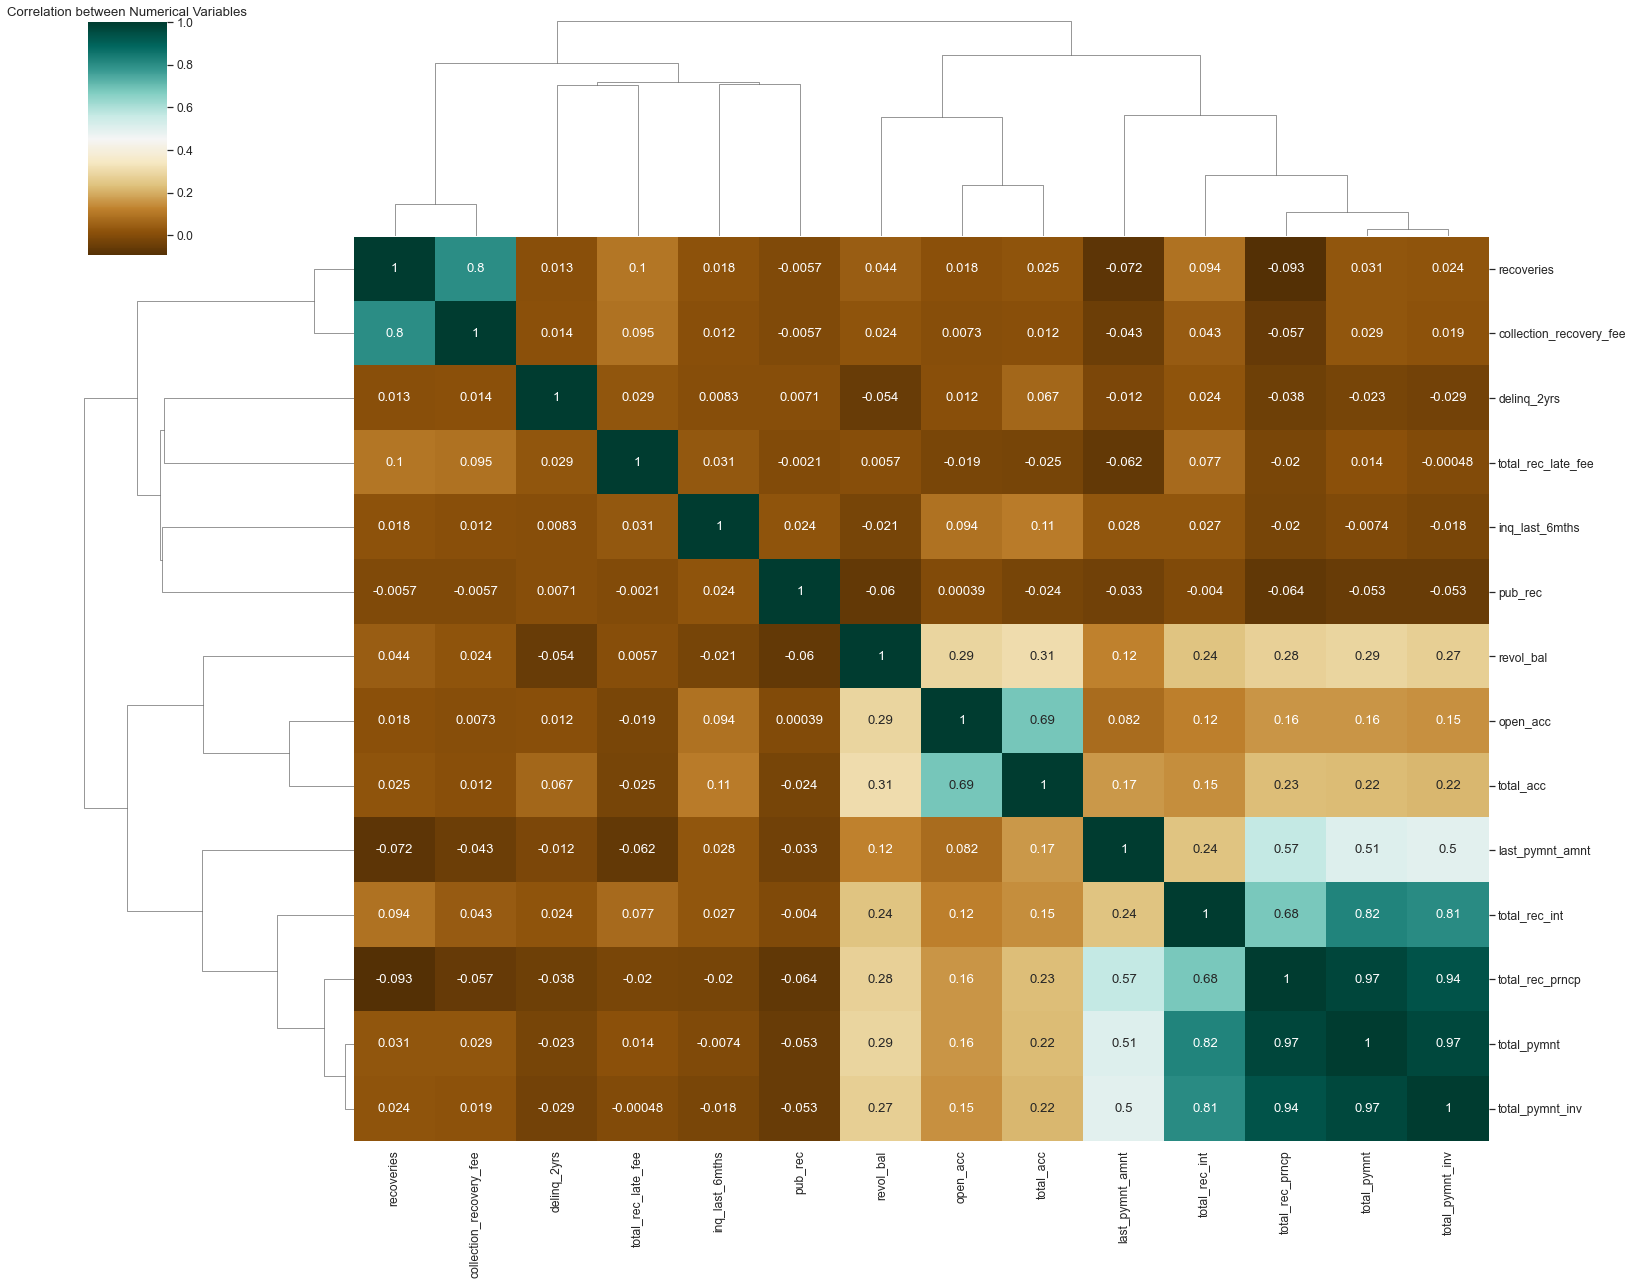

In [938]:
#Correaltion of variables for all the customer behaviour numerical variables

loan_Corr_Sub = loan[['delinq_2yrs', 'inq_last_6mths', 'open_acc','pub_rec','revol_bal','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt']].copy()
sns.set(font_scale=1.1)
sns.clustermap(loan_Corr_Sub.corr(),annot=True,figsize=(22, 18),cmap="BrBG")
plt.title("Correlation between Numerical Variables") 
plt.show()

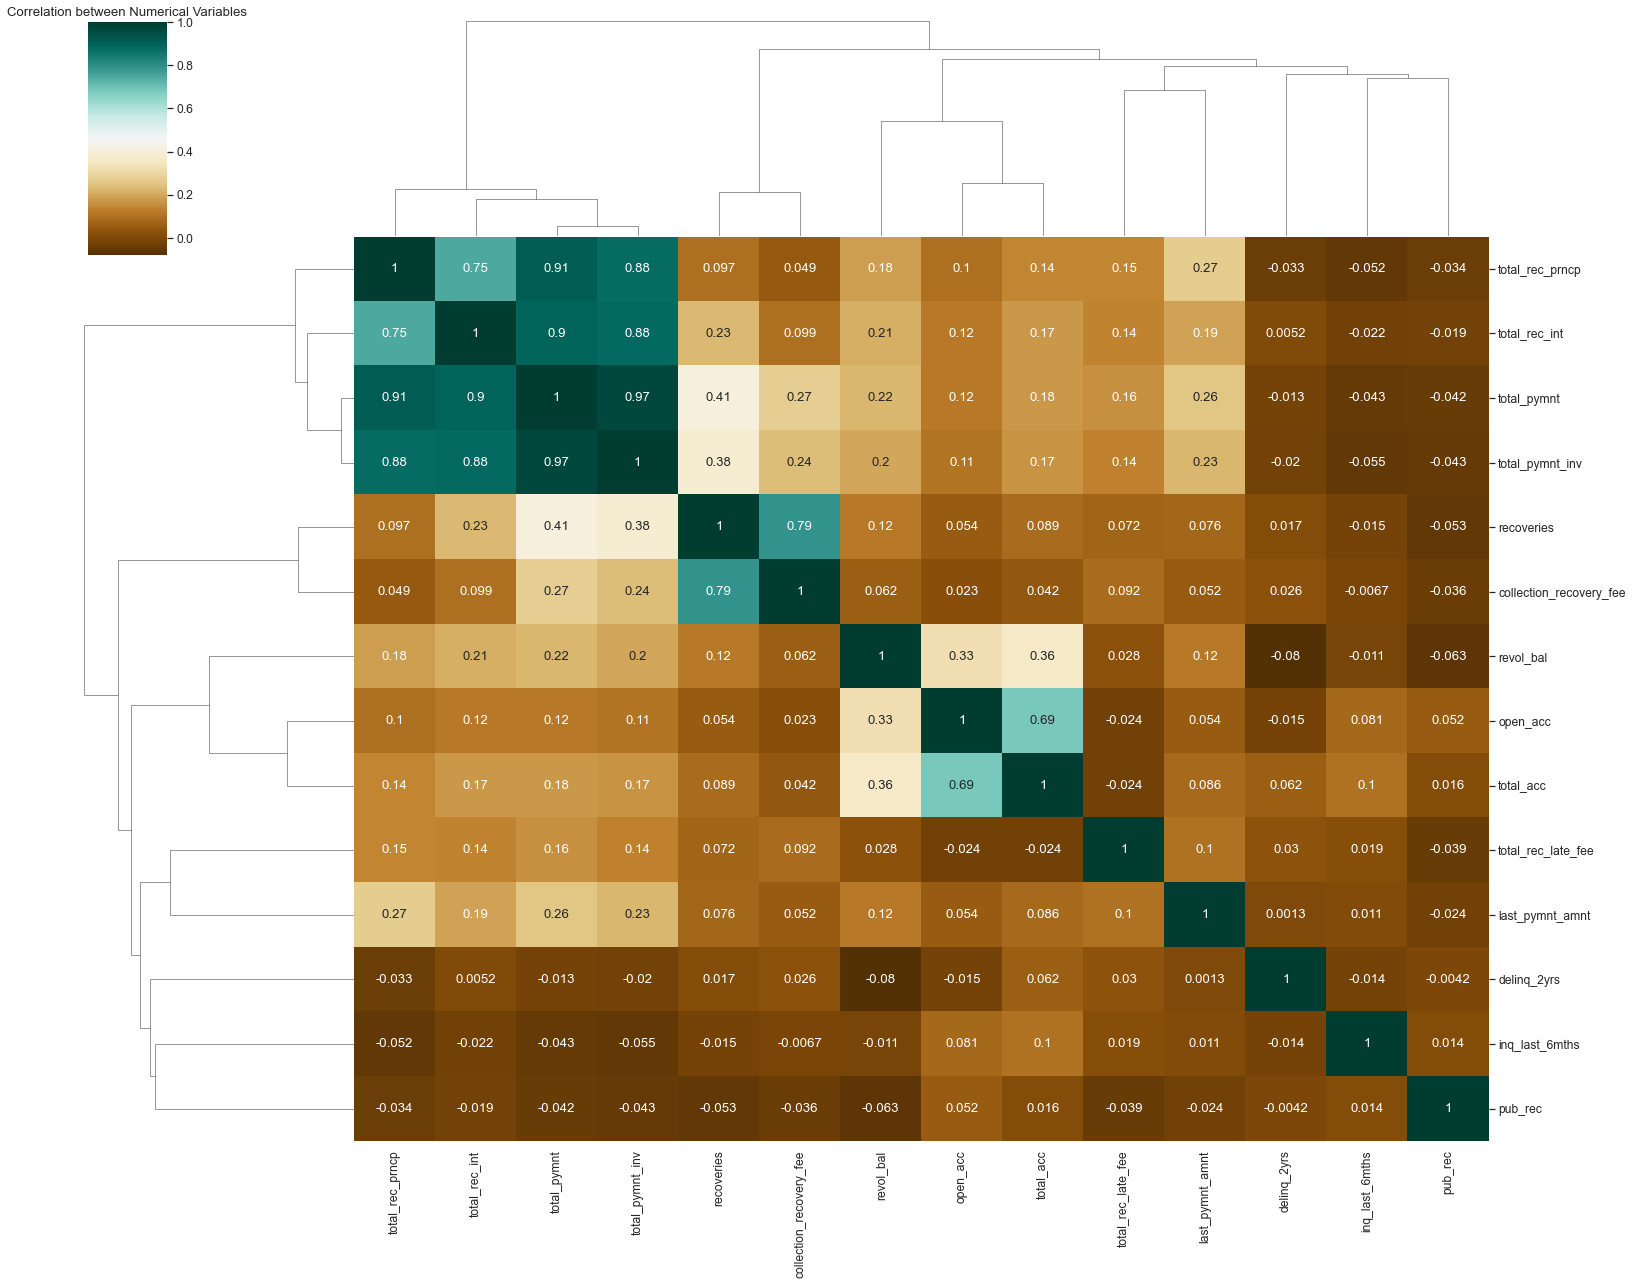

In [939]:
#Correlation for only the Charged Off data set

loan_Corr_Sub = loan[['delinq_2yrs', 'inq_last_6mths', 'open_acc','pub_rec','revol_bal','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','loan_status']].copy()
loan_Corr_Sub = loan_Corr_Sub[-(loan_Corr_Sub["loan_status"] != "Charged Off")]
sns.set(font_scale=1.1)
sns.clustermap(loan_Corr_Sub.corr(),annot=True,figsize=(22, 18),cmap="BrBG")
plt.title("Correlation between Numerical Variables") 
plt.show()